## Author : Mercy Njambi Mukundi

# *1. Introduction*

##  1.1 Overview

The goal of the project is to use exploratory data analysis to generate insights for Microsoft. Microsoft wants to venture into creating original video content, hence, are opening a new movie studio. Microsoft would like actionable insights that the head of it's new movie studio can use to help decide what type of films to create.

## 1.2 Objectives

1. Analyze the types of films are currently doing the best at the box office.

This objective can be met by following the following steps:
- Data selection
- Data cleaning
- Data analysis
- Data visualization


## 1.3 Questions to answer

-  What type of films are currently doing the best at the box office?
    -      a) What films are the highest grossing in the box office?
    -  b) What are the highest rated movies in the box office?
    -  c)What are the genres of the highest grosssing and highest rated movies in the box office?
    - d) Does rating affect movie revenue?
    - e) Does budget affect movie profits?
    - f) Is there a best time to debut a movie? 


# *2. Data wrangling*

## 2.1 Data Description

The data files used for this project are:
1. tn.movie_budget.csv
2. tmdb.movies.csv
3. title.basics.csv
4. name.basics.csv
5. title.crew.csv

The datasets are extracted from the following sites:

- Box Office.
- IMDB.
- Rotten Tomatoes.
- TheMovieDB.
- The Numbers.


## 2.2 Loading Libraries and Datasets

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

In [2]:
# reading the datasets into a dataframe

df_name = pd.read_csv('DATA/name.basics.csv')
df_budget = pd.read_csv("DATA/tn.movie_budgets.csv")
df_ratings = pd.read_csv('DATA/tmdb.movies.csv', index_col=0)
df_genres = pd.read_csv("DATA/title.basics.csv")
df_crew = pd.read_csv('DATA/title.crew.csv')

### 2.2.1 Previewing the Datasets

In [3]:
# previewing the first dataset

df_name.head(3)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"


In [4]:
# previewing the second dataset

df_budget.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [5]:
# previewing the third datasets

df_ratings.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [6]:
# previewing the fourth dataset

df_genres.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [7]:
# previewing the fifth dataset

df_crew.head(3)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585


### 2.2.2 Accessing Information About the Datasets

In [8]:
# Accessing more information about the first dataset

df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


This shows that data has 2 data types: floats and objects. The columns nconst, primary name, primary profession and known for titles are of type object and birth year and death year are of the float type.

In [9]:
df_name.shape

(606648, 6)

This shows the data has 606,648 rows and 6 columns

In [10]:
# Accessing more information about the second dataset

df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


All the data has the data type object

In [11]:
df_budget.shape

(5782, 6)

This shows the data has 5,782 rows and 5 columns

In [12]:
# Accessing more information about the third dataset

df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


This shows that the data has 3 data types: floats, intergers and objects. The columns genre ids, original language, original title, release date and title are of type object, the id and vote count columns are of type integer, and popularity and vote average are of the float type.

In [13]:
df_ratings.shape

(26517, 9)

This shows the data has 26,517 rows and 9 columns

In [14]:
#Accessing more information about the fourth dataset

df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


This shows that data has 3 data types: floats, intergers and objects. The columns tconst, primary title, original title and genres are of type object, the start year column is of type integer, and runtime minutes is of the float type.

In [15]:
df_genres.shape

(146144, 6)

This shows the data has 146,144 rows and 6 columns

In [16]:
#Accessing more information about the fifth dataset

df_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


All the data is of the data type object.

In [17]:
df_crew.shape

(146144, 3)

The data has 146,144 rows and 3 columns.

## 2.3 Data Cleaning

### 2.3.1 Names Dataset

In [18]:
df_name.head(3)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"


In [19]:
#checking the data for null entries.
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


It is noted that all column data types correspond to the data inside them.

In [20]:
# checking for null values

df_name.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

This dataset has a lot of null values in all the columns except ncost and primary name. The other columns are not that important in the analysis, hence, may be dropped.

In [21]:
# dropping the columns

df_name.drop(columns=['birth_year', 'death_year', 'known_for_titles', 'primary_profession' ], inplace=True)

In [22]:
df_name.shape

(606648, 2)

In [23]:
df_name

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [24]:
# check for duplicates in the data

df_name.duplicated().sum()

0

The data has no duplicates

In [25]:
df_name.shape

(606648, 2)

### 2.3.2 Movie Budget Dataset

In [26]:
df_budget.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [27]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


It can be noted that the columns 'production_budget', 'domestic_gross' and 'worldwide_gross' have numerical data, but are of object type object. This can be attributed to them having the '$' symbol and ','. These need to be removed, so that the columns to be converted to integers.

In [28]:
# removing the $ and , from the columns

df_budget['production_budget'] = df_budget['production_budget'].str.replace('$','')
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$','')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')

In [29]:
# converting the columns to integers

df_budget['production_budget'] = df_budget['production_budget'].astype('int64')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype('int64')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype('int64')

In [30]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000,0,0
5778,79,2-Apr-99,Following,6000,48482,240495
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0


In [31]:
#checking the data types of the columns

df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


Now that the data columns have the appropriate data types, the data can now be checked for missing and duplicate values.

In [32]:
# checking if the data has missing values

df_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataset has no null values

In [33]:
# checking for duplicate values

df_budget.duplicated(['movie', 'release_date']).sum()

0

Since movies have remakes, and the remakes often retain the same movie title, the data was checked for duplicates in the movie and release date column. The data has no duplicates.

In [34]:
# checking for lowest grossing numbers

df_budget.sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5037,38,23-Apr-19,Living Dark: The Story of Ted the Caver,1750000,0,0
3975,76,15-May-15,Pound of Flesh,7500000,0,0
4627,28,28-Jun-11,2:13,3500000,0,0
4628,29,29-Jan-13,"Batman: The Dark Knight Returns, Part 2",3500000,0,0
3947,48,21-Jun-19,Burn Your Maps,8000000,0,0
...,...,...,...,...,...,...
33,34,12-Jun-15,Jurassic World,215000000,652270625,1648854864
6,7,27-Apr-18,Avengers: Infinity War,300000000,678815482,2048134200
5,6,18-Dec-15,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
42,43,19-Dec-97,Titanic,200000000,659363944,2208208395


Frm the above data, it is noted that there are some films that don't have grossing data on either the domestic or worldwide grossing. Since grossing is a factor that is to be investigated, retaining these columns would distort the day, hence, these rows need to be dropped.

In [35]:
to_drop = df_budget[(df_budget['domestic_gross'] == 0) & (df_budget['worldwide_gross'] == 0)]
to_drop.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,31-Dec-20,Moonfall,150000000,0,0
479,80,13-Dec-17,Bright,90000000,0,0
480,81,31-Dec-19,Army of the Dead,90000000,0,0


In [36]:
df_budget.drop(to_drop.index, axis=0, inplace=True)

In [37]:
df_budget.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350


### 2.3.3 Movie Ratings

In [38]:
# previewing the dataset

df_ratings.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [39]:
# checking the data types of the columns

df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


From analysis, the data types of the different columns coincide with the data they hold.

Now that the data columns have the appropriate data types, the data can now be checked for missing and duplicate values.

In [40]:
# checking if the data has missing values

df_ratings.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

The data has no missing values

In [41]:
# checking for duplicate values

df_ratings.duplicated(subset=['title', 'release_date']).sum()

1027

The data has 1,027 rows with duplicate data in the title and release date column, as evidenced with the above cell. These columns need to be dropped.

In [42]:
# dropping the duplicates row

df_ratings.drop_duplicates(subset = ['title', 'release_date'], inplace=True)

In [43]:
df_ratings.shape

(25490, 9)

### 2.3.4 Movie Genres Dataset

In [44]:
# previewing the data

df_genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [45]:
# checking the data type of the datasets

df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


All the column's data types correspond to the data in the columns.

Now that the data columns have the appropriate data types, the data can now be checked for missing and duplicate values.

In [46]:
# checking for missing values

df_genres.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

The columns original title, runtime minutes and genres all have missing values. Original title has 21 missing values, runtime minutes 31,739 and genres has 5,408 missing values. Runtime minutes column is not important in the analysis, hence, can be dropped. The null values in genres are not many, hence can be dropped too. A placeholder can be used in the null values under original title column.

In [47]:
# dropping runtime minutes column

df_genres.drop(columns='runtime_minutes', inplace=True)

In [48]:
# dropping the rows with null values under genre column

df_genres.dropna(axis=0, subset = ['genres'], inplace=True)

In [49]:
# filling null values with a placeholder

df_genres.fillna('MISSING', inplace=True)

In [50]:
# checking for duplicates

df_genres.duplicated(subset= ['primary_title', 'start_year']).sum()

1813

As evidenced above, there are some rows with duplicate values( 1,813 rows). These rows need to be dropped.

In [51]:
# dropping the duplicate rows

df_genres.drop_duplicates(subset= ['primary_title', 'start_year'], inplace = True)

In [52]:
df_genres.shape

(138923, 5)

### 2.3.5 Crew Dataset

In [53]:
# previewing the data

df_crew.head(3)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585


In [54]:
# checking the data type of the datasets

df_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


All the data corresponds to the data in the columns

In [55]:
# checking for missing values

df_crew.isna().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

The data has alot of missing data in the directors and writers columns. Since these columns will be used in the analysis later on, a place holder can be used to fill in the missing values.

In [56]:
# filling in the missing values

df_crew.fillna('MISSING',inplace=True)

In [57]:
# checking for duplicates

df_crew.duplicated().sum()

0

The data has no duplicates

## 2.4 Merging Datasets

In order to merge the data frames, a column is identified in the dataframes with the same data. In the budget, ratings and genres datasets, they all have a column with movie titles. This column names can be renamed to a common name before merging. In this case, the columns will be renamed to 'movie'. Since the budget dataframe already has this name, it will be excluded.

In [58]:
# renaming the column

df_ratings.rename(columns={'title':'movie'}, inplace=True)

In [59]:
# renaming the column

df_genres.rename(columns={'primary_title':'movie'}, inplace=True)

The 3 dataframes can be merged now:

In [60]:
# merging the 3 dataframes

df_budget_ratings_genres = df_budget.merge(df_ratings, how = 'inner', on ='movie').merge(df_genres, how = 'inner', on ='movie')

The dataframes name and crew need to be combined separately before being merged with the above dataframe.

In the crew dataframe, the directors column has nconst values. The directors column can be changed to this name to enable merging.

In [61]:
#renaming the column

df_crew.rename(columns={'directors':'nconst'}, inplace=True)

In [62]:
# merging the dataframes

directors = pd.merge(df_crew,df_name, how='inner', on='nconst')

Now both merged dataframes can be merged to form one dataframe using the tconst column.

In [63]:
df_budget_ratings_genres.shape

(3062, 18)

In [64]:
# merging the 2 dataframes

df_final = pd.merge(df_budget_ratings_genres, directors, how='inner', on='tconst')

In [65]:
df_final.head(3)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id_y,original_language,original_title_x,...,release_date_y,vote_average,vote_count,tconst,original_title_y,start_year,genres,nconst,writers,primary_name
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",19995,en,Avatar,...,2009-12-18,7.4,18676,tt1775309,Abatâ,2009,"Action, Sci-Fi",nm3786927,"nm2179863,nm4392664",James Cameron
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,...,2011-05-20,6.4,8571,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",Rob Marshall
2,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,...,2015-05-01,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",Joss Whedon


In [66]:
# dropping unnecessary columns

df_final.drop(columns=['genre_ids','id_x','id_y','original_language','popularity','nconst','original_title_x','original_title_y','writers','release_date_y','tconst'], inplace=True)

In [67]:
# rounding up the production budget,domestic and worldwide gross to millions

df_final['production_budget'] = df_final['production_budget']/1000000
df_final['domestic_gross'] = df_final['domestic_gross']/1000000
df_final['worldwide_gross'] = df_final['worldwide_gross']/1000000

In [68]:
# renaming the columns

df_final.rename(columns={'release_date_x':'release_date','primary_name':'directors_name','production_budget':'production_budget_millions','domestic_gross':'domestic_gross_millions','worldwide_gross':'worldwide_gross_millions'},inplace=True)

Using the assumption that profits made on a movie is the difference between the total gross and the production budget, the profits for the dataset are calculated.

In [69]:
# calculating the profit per movie

df_final['movie_profits_millions'] = ((df_final['worldwide_gross_millions'] - df_final['production_budget_millions'])).astype('float64')

In [70]:
column_names ='release_date','movie','production_budget_millions','domestic_gross_millions','worldwide_gross_millions','movie_profits_millions','genres','directors_name','vote_average','vote_count','popularity','start_year'

In [71]:
# reordering the columns

df_final.reindex(columns=column_names)

,release_date,movie,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,movie_profits_millions,genres,directors_name,vote_average,vote_count,popularity,start_year
0,18-Dec-09,Avatar,425.000,760.507625,2776.345279,2351.345279,"Action, Sci-Fi",James Cameron,7.4,18676,NaN,2009
1,20-May-11,Pirates of the Caribbean: On Stranger Tides,410.600,241.063875,1045.663875,635.063875,"Action,Adventure,Fantasy",Rob Marshall,6.4,8571,NaN,2011
2,1-May-15,Avengers: Age of Ultron,330.600,459.005868,1403.013963,1072.413963,"Action,Adventure,Sci-Fi",Joss Whedon,7.3,13457,NaN,2015
3,17-Nov-17,Justice League,300.000,229.024295,655.945209,355.945209,"Action,Adventure,Fantasy",Zack Snyder,6.2,7510,NaN,2017
4,6-Nov-15,Spectre,300.000,200.074175,879.620923,579.620923,"Action,Adventure,Thriller",Sam Mendes,6.4,6719,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
2746,27-Jan-17,Emily,0.027,0.003547,0.003547,-0.023453,Drama,Ryan Graves,7.0,1,NaN,2017
2747,27-Jan-17,Emily,0.027,0.003547,0.003547,-0.023453,Documentary,Pj Mills,7.0,1,NaN,2013
2748,1-Sep-15,Exeter,0.025,0.000000,0.489792,0.464792,"Horror,Mystery,Thriller",Marcus Nispel,4.7,121,NaN,2015
2749,1-Sep-15,Exeter,0.025,0.000000,0.489792,0.464792,Horror,Ann Tramonte,4.7,121,NaN,2014


In [72]:
# checking for null values

df_final.isna().sum()

release_date                  0
movie                         0
production_budget_millions    0
domestic_gross_millions       0
worldwide_gross_millions      0
vote_average                  0
vote_count                    0
start_year                    0
genres                        0
directors_name                0
movie_profits_millions        0
dtype: int64

In [73]:
# checking for duplicates

df_final.duplicated(['movie','release_date','start_year']).sum()

575

In [74]:
df_final.drop_duplicates(subset= ['movie','release_date'] ,inplace=True)

In [75]:
# Exporting this combined dataframe to a csv

df_final.to_csv('Final Combined Microsoft Data.csv')

# *3. Exploratory Data Analysis (EDA)*

### 3.1 What movies are highly rated and grossing the highest?

In [76]:
# sorting to find movies with the highest ratings per votes cast

movie_ratings = df_final.sort_values(by = ['vote_count', 'vote_average'],ascending=(False, False)).head(10)
movie_ratings = movie_ratings.sort_values('vote_average',ascending=False).reset_index(drop=True)

In [77]:
# movies with the highest ratings

movie_ratings.loc[:,['movie','vote_average','directors_name']]

,movie,vote_average,directors_name
0,Inception,8.3,Christopher Nolan
1,Interstellar,8.2,Christopher Nolan
2,Django Unchained,8.0,Quentin Tarantino
3,Guardians of the Galaxy,7.9,James Gunn
4,Deadpool,7.6,Tim Miller
5,The Avengers,7.6,Joss Whedon
6,Avatar,7.4,James Cameron
7,Mad Max: Fury Road,7.4,George Miller
8,The Hunger Games,7.1,Gary Ross
9,Iron Man 3,6.9,Shane Black


In [78]:
# sorting values to find movies with the highest grossing

df_biggest_gross = df_final.sort_values('worldwide_gross_millions', ascending = False).head(10)
df_biggest_gross.reset_index(drop=True)

,release_date,movie,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,vote_average,vote_count,start_year,genres,directors_name,movie_profits_millions
0,18-Dec-09,Avatar,425.0,760.507625,2776.345279,7.4,18676,2009,"Action, Sci-Fi",James Cameron,2351.345279
1,12-Jun-15,Jurassic World,215.0,652.270625,1648.854864,6.6,14056,2015,"Action,Adventure,Sci-Fi",Colin Trevorrow,1433.854864
2,3-Apr-15,Furious 7,190.0,353.007020,1518.722794,7.3,6538,2015,"Action,Crime,Thriller",James Wan,1328.722794
3,4-May-12,The Avengers,225.0,623.279547,1517.935897,7.6,19673,2012,"Action,Adventure,Sci-Fi",Joss Whedon,1292.935897
4,1-May-15,Avengers: Age of Ultron,330.6,459.005868,1403.013963,7.3,13457,2015,"Action,Adventure,Sci-Fi",Joss Whedon,1072.413963
5,16-Feb-18,Black Panther,200.0,700.059566,1348.258224,5.1,11,2018,"Action,Adventure,Sci-Fi",Ryan Coogler,1148.258224
6,22-Jun-18,Jurassic World: Fallen Kingdom,170.0,417.719760,1305.772799,6.5,5995,2018,"Action,Adventure,Sci-Fi",J.A. Bayona,1135.772799
7,22-Nov-13,Frozen,150.0,400.738009,1272.469910,5.8,987,2010,"Adventure,Drama,Sport",Adam Green,1122.469910
8,17-Mar-17,Beauty and the Beast,160.0,504.014165,1259.199706,7.7,5730,2014,"Drama,Fantasy,Romance",Christophe Gans,1099.199706
9,15-Jun-18,Incredibles 2,200.0,608.581744,1242.520711,7.6,6354,2018,"Action,Adventure,Animation",Brad Bird,1042.520711


In [79]:
# movies with the highest gross

df_biggest_gross.loc[:,['movie','worldwide_gross_millions']]

,movie,worldwide_gross_millions
0,Avatar,2776.345279
19,Jurassic World,1648.854864
65,Furious 7,1518.722794
14,The Avengers,1517.935897
2,Avengers: Age of Ultron,1403.013963
46,Black Panther,1348.258224
98,Jurassic World: Fallen Kingdom,1305.772799
137,Frozen,1272.469910
111,Beauty and the Beast,1259.199706
48,Incredibles 2,1242.520711


<ipython-input-80-effc7bb2be72>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels = y,fontsize=14)


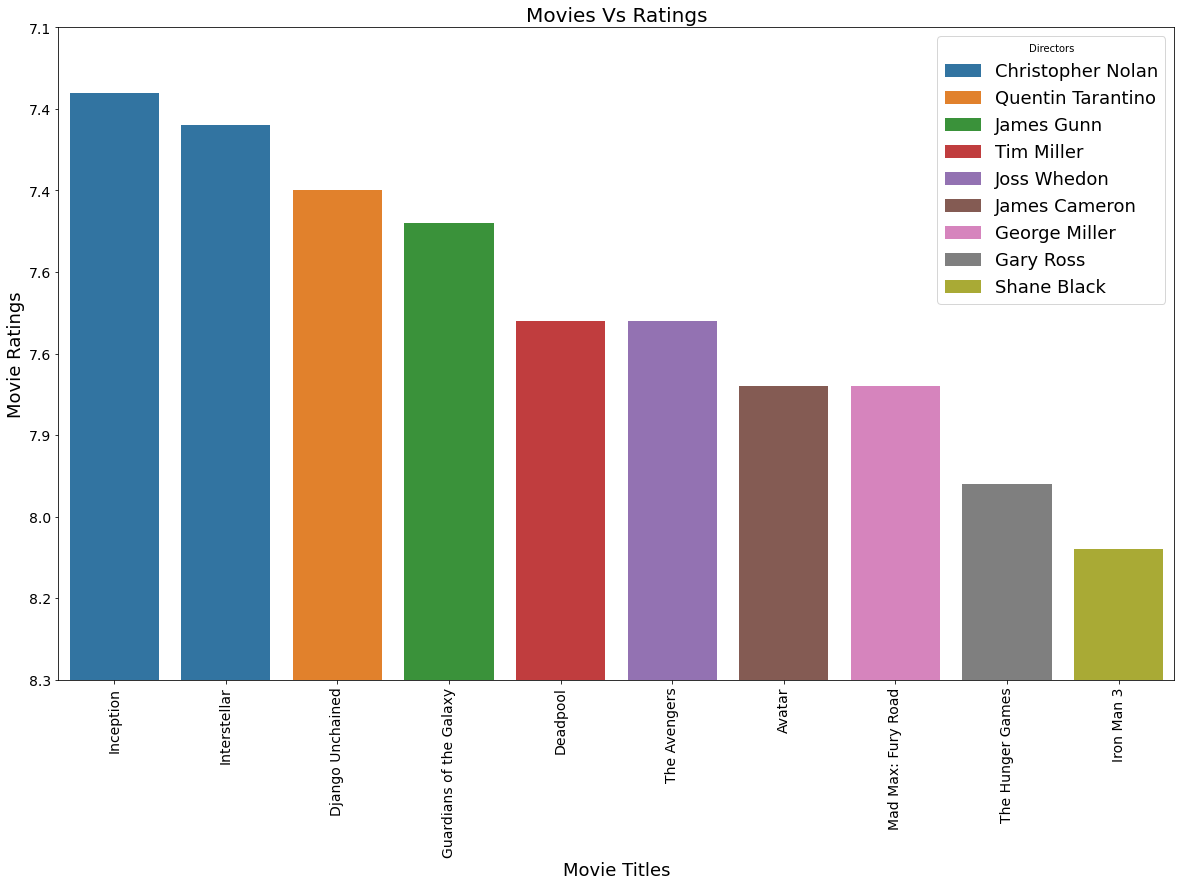

In [80]:
# plotting the data above

fig, ax1= plt.subplots(figsize=(20,12))

x = list(movie_ratings['movie'].values)
y = movie_ratings['vote_average']

ax1 = sns.barplot(data = movie_ratings, x = 'movie', y = 'vote_average', hue = 'directors_name', ax = ax1, dodge=False)

ax1.set_title('Movies Vs Ratings', fontsize=20)
ax1.set_xlabel("Movie Titles",fontsize=18)
ax1.set_ylabel("Movie Ratings", fontsize=18)
ax1.legend(title='Directors', fontsize=18, loc=1)
ax1.set_xticklabels(labels = x, rotation = 60,fontsize=14)
ax1.set_yticklabels(labels = y,fontsize=14)

ax1.set_xticklabels(labels = x, rotation = 90)
ax1.set_ylim(6.5, 8.5)
fig.savefig('Movies Vs Ratings - Directors.png')



<ipython-input-81-0b10693e19e3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels = y,fontsize=14)


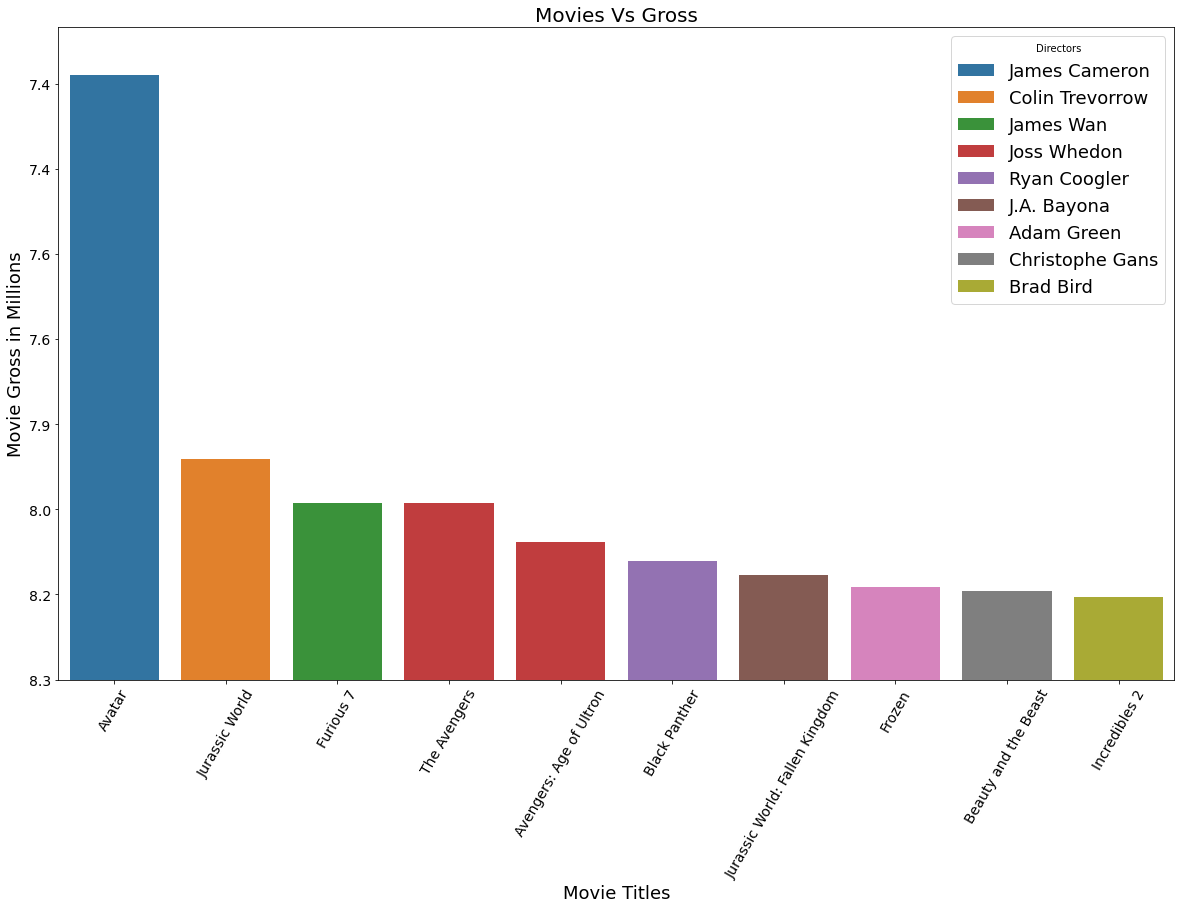

In [81]:
fig, ax2= plt.subplots(figsize=(20,12))
ax2 = sns.barplot(data = df_biggest_gross, x = 'movie', y = 'worldwide_gross_millions', hue = 'directors_name', ax = ax2, dodge=False)

labels = list(df_biggest_gross['movie'])
ax2.set_title('Movies Vs Gross', fontsize=20)
ax2.set_xlabel("Movie Titles",fontsize=18)
ax2.set_ylabel("Movie Gross in Millions", fontsize=18)
ax2.set_ylim(1000)
ax2.legend(title='Directors', fontsize=18, loc=1)

ax2.set_xticklabels(labels = labels, rotation = 60,fontsize=14)
ax2.set_yticklabels(labels = y,fontsize=14)

fig.savefig('Movies Vs Gross - Directors).png');

From the above analysis, one can see the directors responsible for all the highest grossing and rated movies. Those from the highly rated movies include:
1. Christopher Nolan (2)
2. Quentin Tarantino
3. James Gunn
4. Tim Miller
5. **Joss Whedon**
6. **James Cameron**
7. George Miller
8. Gary Ross
9. Shane Black

Those from the highest grossing movies include :
1. Colin Trevorrow
2. James Wan
3. **Joss Whedon (2)**
4. Ryan Coogler
5. J.A. Bayona
6. Adam Green
7. Christophe Gans
8. Brad Bird
9. **James Cameron**

Directors such as Joss Whedon and James Cameron appear in both lists. These would be directors that the studio should consider to  hire to direct their movies.

 ### 3.2 Does budget affect revenue?

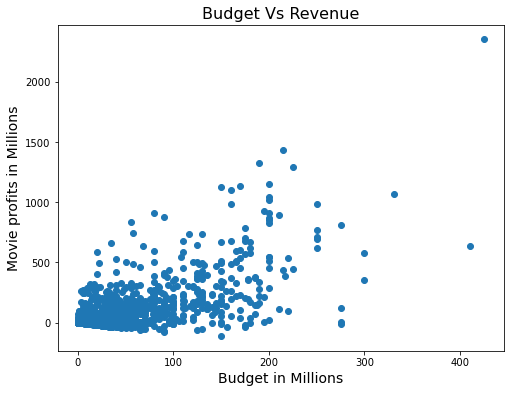

In [82]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = df_final['production_budget_millions']
y = df_final['movie_profits_millions']

ax.scatter(x,y)

ax.set_title('Budget Vs Revenue', fontsize=16)
ax.set_xlabel("Budget in Millions",fontsize=14)
ax.set_ylabel("Movie profits in Millions", fontsize=14)
fig.savefig('Budget vs Revenue.png');

There is a positive relashionship between between movie budget and movie profits. As the budget increases, the movie profits increase too.

 ### 3.3 Does rating affect revenue?

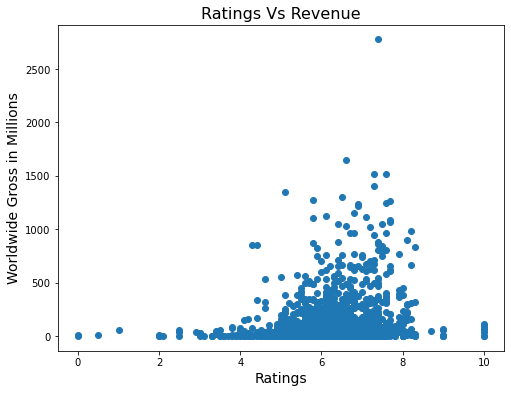

In [83]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = df_final['vote_average']
y = df_final['worldwide_gross_millions']

ax.scatter(x,y)

ax.set_title('Ratings Vs Revenue', fontsize=16)
ax.set_xlabel("Ratings",fontsize=14)
ax.set_ylabel("Worldwide Gross in Millions", fontsize=14)
fig.savefig('Ratings vs Revenue.png');

From the above plot, it is possible to deduce that ratings affect revenue. It can be noted that movies with high ratings have a high revenue.

 ### 3.4 What are the genres of the highest grosssing movies in the box office?

In [84]:
top100_grossing = df_final.sort_values('worldwide_gross_millions', ascending = False).head(100)

In [85]:
# accessing the individual genre element per row

movie_genres = []

for genre in top100_grossing['genres']:
    movie_genres.append(genre.split(','))

In [86]:
movie_genres

[['Action', ' Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Crime', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Sport'],
 ['Drama', 'Fantasy', 'Romance'],
 ['Action', 'Adventure', 'Animation'],
 ['Action', 'Crime', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Thriller'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Animation', 'Drama'],
 ['Action', 'Adventure', 'Comedy'],
 ['Adventure', 'Drama', 'Family'],
 ['Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy'],
 ['Biography', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Sci-

In [87]:
# accessing all genre elements in the rows

movie_genres_list = []

for data in movie_genres:
    for item in data:
        movie_genres_list.append(item)

In [88]:
# accessing all the unique genres in the rows

unique_genres = []

for item in movie_genres_list:
    if item not in unique_genres:
        unique_genres.append(item)

In [89]:
# finding how many films were made per genre

m_count = Counter(movie_genres_list)

In [90]:
m_count

Counter({'Action': 64,
         ' Sci-Fi': 1,
         'Adventure': 77,
         'Sci-Fi': 31,
         'Crime': 5,
         'Thriller': 10,
         'Drama': 20,
         'Sport': 1,
         'Fantasy': 23,
         'Romance': 3,
         'Animation': 13,
         'Comedy': 18,
         'Family': 7,
         'Biography': 3,
         'Music': 1,
         'Horror': 3,
         'Mystery': 2,
         'Musical': 1,
         'History': 1})

It is noted that there are 2 Sci-Fi categories, these are merged as follows.

In [91]:
# deleting the sci-fi key-value pair with space

m_count['Sci-Fi'] = 32
del m_count[' Sci-Fi']

In [92]:
# separating the genres and the count

genre = []
count = []

for key, values in m_count.items():
    genre.append(key)
    count.append(values)

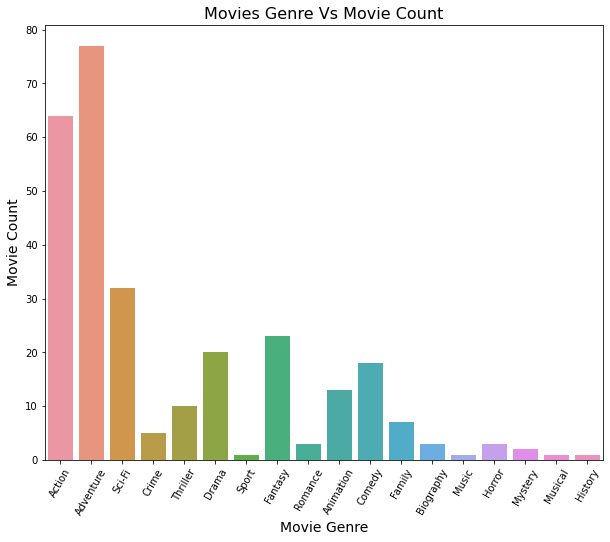

In [93]:
# plotting the data above

fig, ax = plt.subplots(figsize=(10,8))

x = genre
y = count

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Movies Genre Vs Movie Count', fontsize=16)
ax.set_xlabel("Movie Genre",fontsize=14)
ax.set_ylabel("Movie Count", fontsize=14);

ax.set_xticklabels(labels = x, rotation = 60)
fig.savefig('Movies Genres Vs Movie Count.png');

It can be noted that the among the top 100 highest grossing , the genres with the highest movie counts are :
1. Adventure - 77
2. Action -64
3. Sci-Fi -32

### 3.5 Is there a best time to debut the movies?

In [94]:
df_final.head(2)

,release_date,movie,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,vote_average,vote_count,start_year,genres,directors_name,movie_profits_millions
0,18-Dec-09,Avatar,425.0,760.507625,2776.345279,7.4,18676,2009,"Action, Sci-Fi",James Cameron,2351.345279
1,20-May-11,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,6.4,8571,2011,"Action,Adventure,Fantasy",Rob Marshall,635.063875


In [95]:
# convert release date to date-time

df_final['release_date'] = pd.to_datetime(df_final['release_date'])

In [96]:
df_final.head(2)

,release_date,movie,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,vote_average,vote_count,start_year,genres,directors_name,movie_profits_millions
0,2009-12-18,Avatar,425.0,760.507625,2776.345279,7.4,18676,2009,"Action, Sci-Fi",James Cameron,2351.345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,6.4,8571,2011,"Action,Adventure,Fantasy",Rob Marshall,635.063875


In [97]:
df_final['release_date'].head(3)

0   2009-12-18
1   2011-05-20
2   2015-05-01
Name: release_date, dtype: datetime64[ns]

In [98]:
# accessing the release month of the movies and creating a new column for it

df_final['release_month'] = df_final['release_date'].dt.month

In [99]:
df_final['release_month'].head(3)

0    12
1     5
2     5
Name: release_month, dtype: int64

In [100]:
# retrieving the mean gross of the movies per month

month_gross_mean = df_final.groupby('release_month')['worldwide_gross_millions'].mean()

In [101]:
# converting the above to a dataframe

monthly_mean_gross = pd.DataFrame(month_gross_mean)
monthly_mean_gross.reset_index(drop=False, inplace=True)

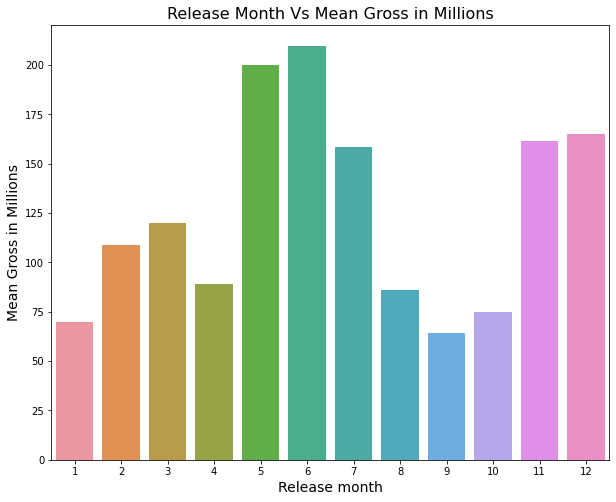

In [102]:
# plotting the data above

fig, ax = plt.subplots(figsize=(10,8))

x = monthly_mean_gross['release_month']
y = monthly_mean_gross['worldwide_gross_millions']

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Release Month Vs Mean Gross in Millions', fontsize=16)
ax.set_xlabel("Release month",fontsize=14)
ax.set_ylabel("Mean Gross in Millions", fontsize=14);

#ax.set_xticklabels(labels = x)
fig.savefig('Release Month Vs Mean Gross in Millions.png');

It can be noted that May, June and July have the highest gross. This means movies that were released during these months grossed more. These months can be adopted by Microsoft for when they release their movies. This may be attributed to the months falling within summer.

# 4. Conclusions

1. Movies with a high budget make more profits as compared to those with a large budget.
2. High rated movies gross higher, hence high profit margins.
3. Adventure, action and Science fiction genre of movies are the best to venture into since they gross the highest and have a high count of numbers.
4. Movies released in May, June and July grossed the highest as compared to the other months.